# ML Challenge - predicting classes


## Import Libraries

In [132]:
import pandas as pd					# pandas is a dataframe library
import matplotlib.pyplot as plt		# matplotlib.pyplot plots data
import numpy as np 					# numpy provides N-dim object support
import os							# loading relative paths

In [133]:
# do ploting inline instead of in separate window
%matplotlib inline

## Load and review data

In [151]:
trainFile = "C:/Users/Administrator/Documents/GitHub/recruitment_challenge/ML_201703/sample.csv" # adjust path if necessary

pwd = os.getcwd()
os.chdir(os.path.dirname(trainFile))
df = pd.read_csv(os.path.basename(trainFile), header=None)  # loading data.
os.chdir(pwd)

In [152]:
df.shape

(66137, 296)

In [153]:
# inspecting the newly loaded data
df.head()

,0,1,2,3,4,5,6,7,8,9,...,286,287,288,289,290,291,292,293,294,295
0,0,0,0,20000.0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,259.227165,B
1,0,0,0,7059.0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,271.983584,E
2,0,0,0,3150.0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,235.233437,D
3,0,0,0,24000.0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,415.104389,C
4,0,0,0,5600.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,462.230610,D


no collumn name

In [138]:
df.isnull().values.any() # check for null values

False

In [139]:
def plot_corr(df, size=11):
	"""
	Function plots a graphical correlation matrix for each pair of columns in the dataframe.
		Input:
		df: pandas DataFrame
		size: vertical and horizontal size of the plot

	Displays:
		matrix of correlation between columns. 			Blue-cyan-yellow-red-darkred -> less to more correlated
                                                        0 ---------------------> 1
                                                        Expect a darkred line running from top left to bottom right
	"""
	corr = df.corr()	# data frame correlation function
	fig, ax = plt.subplots(figsize = (size, size))
	ax.matshow(corr)	# color code the rectangles by correlation value
	plt.xticks(range(len(corr.columns)), corr.columns)	# draw x tick marks
	plt.yticks(range(len(corr.columns)), corr.columns)	# draw y tick marks 

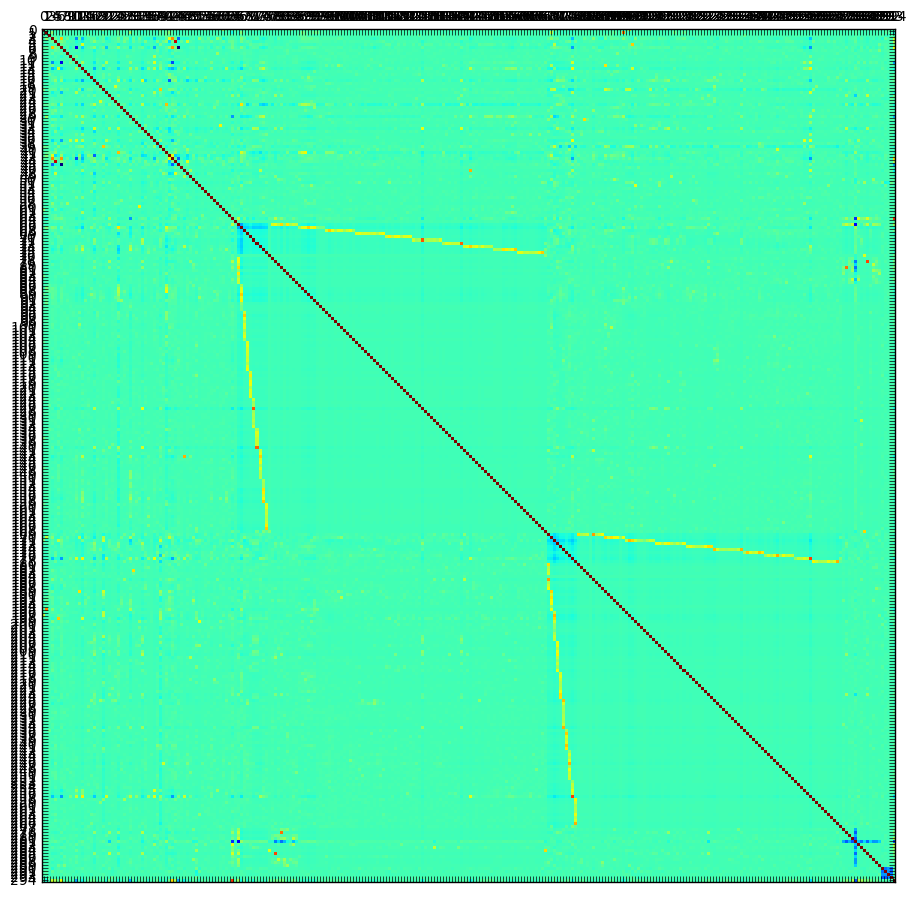

In [140]:
plot_corr(df)

ccxyvy vx


In [141]:
cor = df.corr()
cor.loc[:,:] =  np.tril(cor.values, k=-1)
cor = cor.stack()
cor[cor > 0.6]

44   4      0.891462
127  71     0.688079
140  72     0.661066
195  1      0.602828
257  177    0.731107
278  80     0.628463
285  78     0.711870
294  64     0.748347
dtype: float64

write something here

In [143]:
class_col = df[df.columns[284]]
dff = class_col.apply(pd.value_counts)
newTable = dff.fillna(0)


class_map = {True : 1, False : 0} # defining map dicionary 
newTable['A'] = newTable['A'].map(class_map)
newTable['B'] = newTable['B'].map(class_map)
newTable['C'] = newTable['C'].map(class_map)
newTable['D'] = newTable['D'].map(class_map)
newTable['E'] = newTable['E'].map(class_map)

newTable.head(5)



,A,B,C,D,E
0,0,1,0,0,0
1,0,0,0,0,1
2,0,0,0,1,0
3,0,0,1,0,0
4,0,0,0,1,0


In [144]:
num_trueA = len(newTable.loc[newTable['A'] == True])
num_falseA = len(newTable.loc[newTable['A'] == False])

num_trueB = len(newTable.loc[newTable['B'] == True])
num_falseB = len(newTable.loc[newTable['B'] == False])

num_trueC = len(newTable.loc[newTable['C'] == True])
num_falseC = len(newTable.loc[newTable['C'] == False])

num_trueD = len(newTable.loc[newTable['D'] == True])
num_falseD = len(newTable.loc[newTable['D'] == False])

num_trueE = len(newTable.loc[newTable['E'] == True])
num_falseE = len(newTable.loc[newTable['E'] == False])

print("Number of A classes: {0}".format(num_trueA)) # 1,3%
print("Number of B classes: {0}".format(num_trueB)) # 10,0%
print("Number of C classes: {0}".format(num_trueC)) # 70,9%
print("Number of D classes: {0}".format(num_trueD)) # 14,0%
print("Number of E classes: {0}".format(num_trueE)) # 3,8%

Number of A classes: 867
Number of B classes: 6602
Number of C classes: 46882
Number of D classes: 9279
Number of E classes: 2507


Bad distribution of classes results. 
Only a really small amount of data is classified as "A" (1,3%). Thus, a standard learning technique might not work very well. In this particular case, we need to use a special advanced technique.

Around 10,0% of the data is classified as B. in these case, falls into the same problem as class A which has not many samples

The Class C represents the vast majority of the cases covering around 70,9% of the total amount of classes.

D -> 14,0%
E -> 3,8%

Standards prediction techniques can be used to classify what is C and what is NOT C

In [145]:
msk = np.random.rand(len(df)) < 0.7
trainData = df[msk]
testData = df[~msk]

In [146]:
print("Shape of train data: {0}".format(trainData.shape))
print("Shape of test data: {0}".format(testData.shape))

Shape of train data: (46339, 285)
Shape of test data: (19798, 285)


In [149]:
from sklearn.cross_validation import train_test_split

feature_col_names = range(0, 283)
predicted_class_name = [284]

In [150]:
X = df[feature_col_names].values # predictor feature columns (8 X m)
Y = df[predicted_class_name].values # predicted class (1=true, 0=false) column (1 X m)
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= split_test_size, random_state=42) # test_size = 0.3 is 30%, 42 is the answer to everything



KeyError: '[ 59 179 268 269 270 271 272 273 274 275 276] not in index'

### Verifying predicted value was split correctly

verify if the split data preserved the percentage of class distribution  among the new data sets
check to ensure we have the desired 70% train, 30% test split of the data

0.00% in training set


### Post-split Data Preparation


In [125]:
print("# rows in dataframe {0}".format(len(df)))

# rows in dataframe 66137


In [126]:
nn = df.loc[:, (df != df.ix[0]).any()] 

In [154]:
nn = df.loc[:, (df != df.ix[0]).any()] # panda dataframe remove constant column
nn.shape # the dataset has 11 constant column. They will not help the prediction model. thus, I believe I need to remove them.

# 
# [ 59 179 268 269 270 271 272 273 274 275 276] are the column index with unique values 

(66137, 285)

(66137, 285)